In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import datetime as dt

df = pd.read_csv('/Users/colby/Desktop/Thinkful/kickstarter-projects/ks-projects-201801.csv')

In [2]:
#df = df.drop(['ID', 'name', 'goal', 'pledged'], axis=1)
#df = df.drop('usd pledged', axis=1)

# Create new column for Average $ per pledge
df['avg_pledge_amount'] = df['usd_pledged_real'] / df['backers']

In [3]:
df = df.drop(['ID', 'name', 'goal', 'pledged', 'usd pledged'], axis=1)

In [4]:
df = df.drop(['currency', 'country'], axis=1)

In [5]:
df['deadline'] = pd.to_datetime(df['deadline']).dt.date
df['launched'] = pd.to_datetime(df['launched']).dt.date
df['campaign_length'] = (df['deadline'] - df['launched']).dt.days

In [6]:
# Create season variable for the campaign launch date
# 1 = winter
# 2 = spring
# 3 = summer
# 4 = autumn


df['launch_season'] = df.launched.apply(lambda dt: (dt.month%12 + 3)//3)

In [7]:
df.shape

(378661, 11)

In [8]:
df.dtypes

category              object
main_category         object
deadline              object
launched              object
state                 object
backers                int64
usd_pledged_real     float64
usd_goal_real        float64
avg_pledge_amount    float64
campaign_length        int64
launch_season          int64
dtype: object

In [9]:
df.head()

,category,main_category,deadline,launched,state,backers,usd_pledged_real,usd_goal_real,avg_pledge_amount,campaign_length,launch_season
0,Poetry,Publishing,2015-10-09,2015-08-11,failed,0,0.0,1533.95,NaN,59,3
1,Narrative Film,Film & Video,2017-11-01,2017-09-02,failed,15,2421.0,30000.00,161.400000,60,4
2,Narrative Film,Film & Video,2013-02-26,2013-01-12,failed,3,220.0,45000.00,73.333333,45,1
3,Music,Music,2012-04-16,2012-03-17,failed,1,1.0,5000.00,1.000000,30,2
4,Film & Video,Film & Video,2015-08-29,2015-07-04,canceled,14,1283.0,19500.00,91.642857,56,3


## Data Exploration

In [13]:
df.main_category.value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

In [74]:
#df.category.value_counts()

In [10]:
# Verifying null-values.
df.isnull().sum()

category                 0
main_category            0
deadline                 0
launched                 0
state                    0
backers                  0
usd_pledged_real         0
usd_goal_real            0
avg_pledge_amount    52527
campaign_length          0
launch_season            0
dtype: int64

In [11]:
# deleling data what "state" isn't failed or successful

df = df[ (df['state'] != 'live') & (df['state'] != 'undefined') & (df['state'] != 'suspended') & (df['state'] != 'canceled') ]

In [12]:
print('Deleting all rows besides those where STATE == failed/successful leaves {}% of the rows.'.format(331675 / 378661))

Deleting all rows besides those where STATE == failed/successful leaves 0.8759153966212523% of the rows.


In [17]:
df['avg_pledge_amount'] = df.avg_pledge_amount.replace([np.inf, -np.inf], np.nan)

In [18]:
#df['avg_pledge_amount'].apply(lambda x: x.fillna(x.median())) 
df['avg_pledge_amount'].fillna(0, inplace=True)

In [19]:
mean_avg_pledge_amount = df['avg_pledge_amount'].mean(skipna=True)
print (mean_avg_pledge_amount)
2.0

df['avg_pledge_amount']=df.avg_pledge_amount.mask(df.avg_pledge_amount == 0,mean_avg_pledge_amount)

66.08734633674202


In [15]:
# Verifying null-values.
df.isnull().sum()

category             0
main_category        0
deadline             0
launched             0
state                0
backers              0
usd_pledged_real     0
usd_goal_real        0
avg_pledge_amount    0
campaign_length      0
launch_season        0
dtype: int64

In [116]:
df.max()

category                   Zines
main_category            Theater
deadline              2018-01-02
launched              2017-12-29
state                 successful
backers                   219382
usd_pledged_real      2.0339e+07
usd_goal_real        1.66361e+08
avg_pledge_amount          10000
campaign_length               92
launch_season                  4
failed                         1
successful                     1
launched_winter                1
launched_spring                1
launched_summer                1
launched_autumn                1
Art                            1
Comics                         1
Crafts                         1
Dance                          1
Design                         1
Fashion                        1
Film & Video                   1
Food                           1
Games                          1
Journalism                     1
Music                          1
Photography                    1
Publishing                     1
Technology

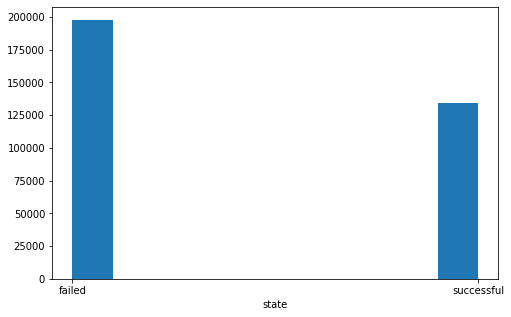

In [96]:
plt.figure(figsize=(8,5))

plt.hist(df.state)
plt.xlabel("state")
plt.ylabel("")
plt.title('')

plt.show()

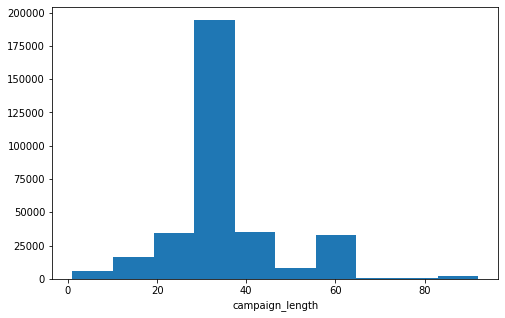

In [20]:
plt.figure(figsize=(8,5))

plt.hist(df.campaign_length)
plt.xlabel("campaign_length")
plt.ylabel("")
plt.title('')

plt.show()

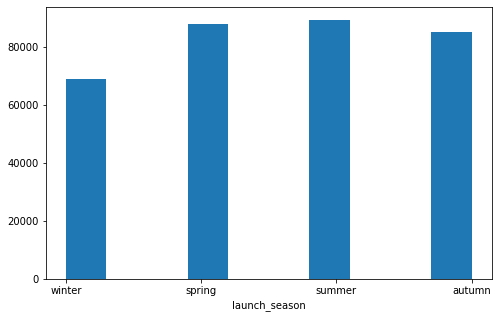

In [132]:
plt.figure(figsize=(8,5))

plt.hist(df.launch_season)
plt.xlabel("launch_season")
plt.ylabel("")
plt.title('')
plt.xticks(range(1,5), ['winter', 'spring', 'summer', 'autumn'])

plt.show()

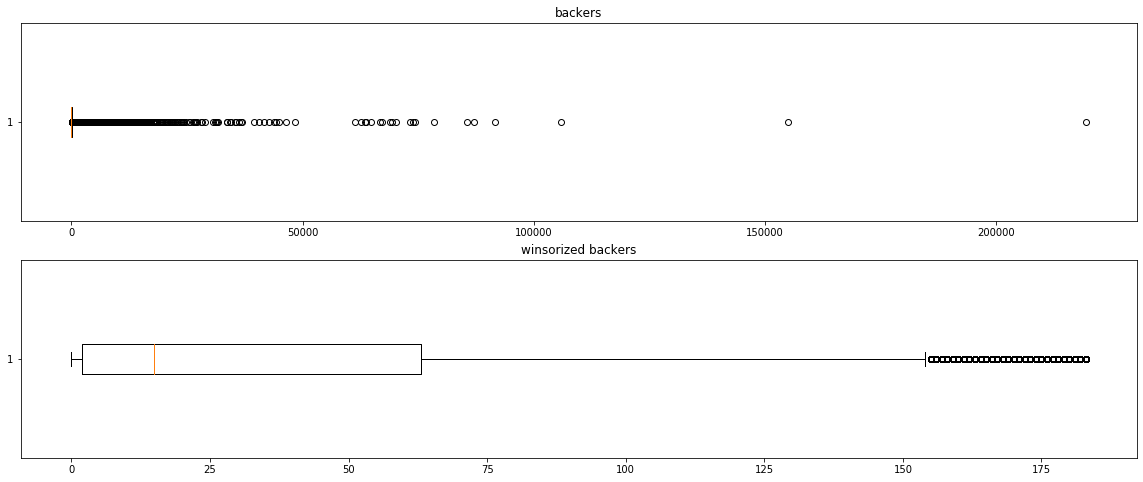

In [119]:
plt.figure(figsize=(20,8))

plt.hist(df.backers, bins=100)
plt.xlabel("backers")
plt.ylabel("")
plt.title('')

plt.subplot(2,1,1)
original_backers = df['backers']
plt.boxplot(original_backers, vert=False)
plt.title("backers")

plt.subplot(2,1,2)
winsorized_backers = winsorize(df['backers'], (0, 0.10))
plt.boxplot(winsorized_backers, vert=False)
plt.title("winsorized backers")

plt.show()

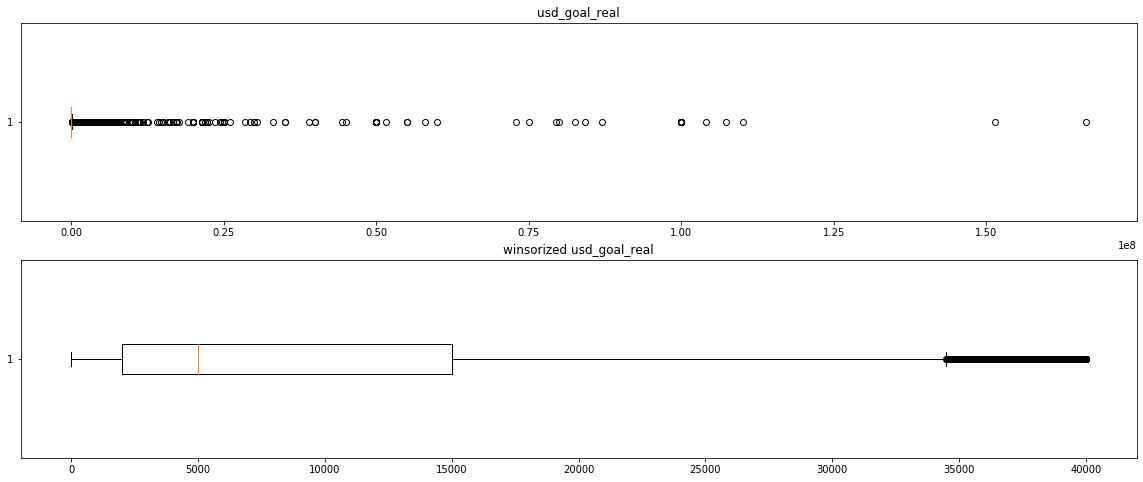

In [94]:
plt.figure(figsize=(20,8))

plt.subplot(2,1,1)
original_usd_goal_real = df['usd_goal_real']
plt.boxplot(original_usd_goal_real, vert=False)
plt.title("usd_goal_real")

plt.subplot(2,1,2)
winsorized_usd_goal_real = winsorize(df['usd_goal_real'], (0, 0.10))
plt.boxplot(winsorized_usd_goal_real, vert=False)
plt.title("winsorized usd_goal_real")

plt.show()

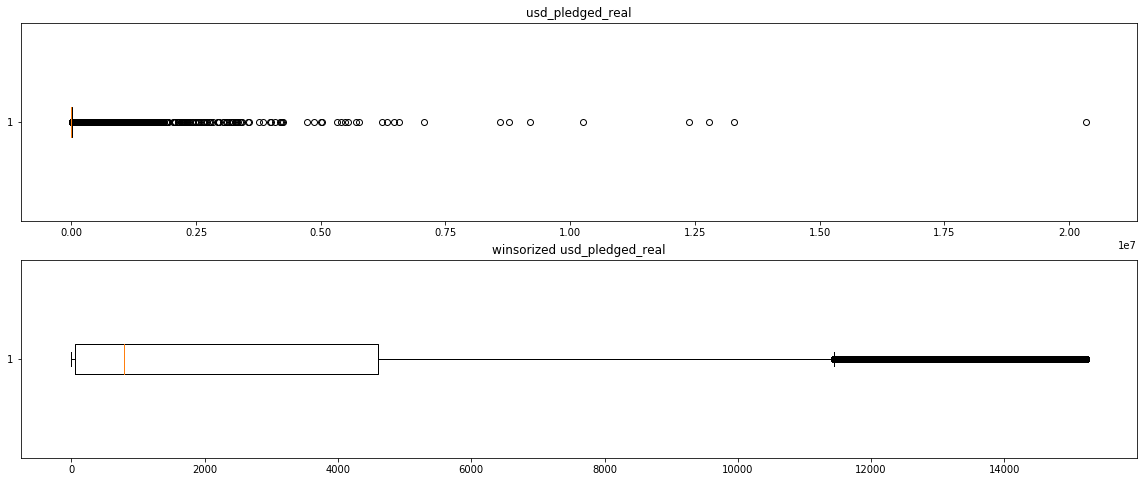

In [95]:
plt.figure(figsize=(20,8))

plt.subplot(2,1,1)
original_usd_pledged_real = df['usd_pledged_real']
plt.boxplot(original_usd_pledged_real, vert=False)
plt.title("usd_pledged_real")

plt.subplot(2,1,2)
winsorized_usd_pledged_real = winsorize(df['usd_pledged_real'], (0, 0.10))
plt.boxplot(winsorized_usd_pledged_real, vert=False)
plt.title("winsorized usd_pledged_real")

plt.show()

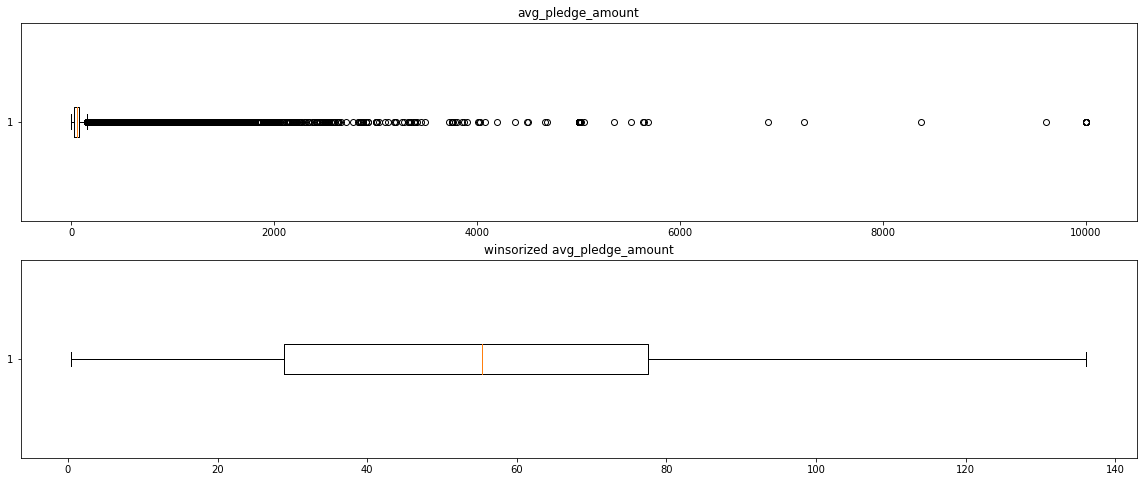

In [93]:
plt.figure(figsize=(20,8))

plt.subplot(2,1,1)
original_avg_pledge_amount = df['avg_pledge_amount']
plt.boxplot(original_avg_pledge_amount, vert=False)
plt.title("avg_pledge_amount")

plt.subplot(2,1,2)
winsorized_avg_pledge_amount = winsorize(df['avg_pledge_amount'], (0, 0.10))
plt.boxplot(winsorized_avg_pledge_amount, vert=False)
plt.title("winsorized avg_pledge_amount")

plt.show()

In [22]:
# Check number of Outliers before Winsorization for each variable.
num_outliers = [df['backers'],df['usd_goal_real'],df['usd_pledged_real'],df['avg_pledge_amount']]

for variable in num_outliers:
    q75, q25 = np.percentile(variable, [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    print("Number of outliers before winsorization : {}".format(len(np.where((variable > max_val) | (variable < min_val))[0])))

Number of outliers before winsorization : 38970
Number of outliers before winsorization : 39049
Number of outliers before winsorization : 41900
Number of outliers before winsorization : 22618


In [23]:
# Apply one-way winsorization to the highest end
# of the value distribution. As we have a lot of extreme
# values, we set the values of the outliers to the 
# value of the 75th percentile. 

#winsorized_backers = winsorize(df['backers'],(0,0.25))
#winsorized_usd_goal_real = winsorize(df['usd_goal_real'],(0,0.25))
#winsorized_usd_pledged_real = winsorize(df['usd_pledged_real'],(0,0.25))
#winsorized_avg_pledge_amount = winsorize(df['avg_pledge_amount'],(0,0.25))

In [24]:
# Check number of Outliers after Winsorization for each variable.
#win_list = [winsorized_backers,winsorized_usd_goal_real,winsorized_usd_pledged_real, winsorized_avg_pledge_amount]

#for variable in win_list:
    #q75, q25 = np.percentile(variable, [75 ,25])
    #iqr = q75 - q25

    #min_val = q25 - (iqr*1.5)
    #max_val = q75 + (iqr*1.5)
    
    #print("Number of outliers after winsorization : {}".format(len(np.where((variable > max_val) | (variable < min_val))[0])))

Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0


In [25]:
# Adding winsorized variables to the data frame.
#df['winsorized_backers'] = winsorized_backers
#df['winsorized_usd_goal_real'] = winsorized_usd_goal_real
#df['winsorized_usd_pledged_real'] = winsorized_usd_pledged_real
#df['avg_pledge_amount'] = winsorized_avg_pledge_amount

In [26]:
df.describe()

,backers,usd_pledged_real,usd_goal_real,avg_pledge_amount,campaign_length,winsorized_backers,winsorized_usd_goal_real,winsorized_usd_pledged_real
count,331675.000000,3.316750e+05,3.316750e+05,331675.000000,331675.000000,331675.000000,331675.000000,331675.000000
mean,116.381581,9.943461e+03,4.151000e+04,42.300571,33.954875,26.119147,7183.842153,1784.238635
std,965.427268,9.673293e+04,1.108930e+06,28.690935,12.713332,25.708778,5642.784501,1917.753806
min,0.000000,0.000000e+00,1.000000e-02,0.000000,1.000000,0.000000,0.010000,0.000000
25%,2.000000,5.000000e+01,2.000000e+03,16.777778,30.000000,2.000000,2000.000000,50.000000
50%,15.000000,7.880000e+02,5.000000e+03,42.378878,30.000000,15.000000,5000.000000,788.000000
75%,63.000000,4.608000e+03,1.500000e+04,77.684211,36.000000,63.000000,15000.000000,4608.000000
max,219382.000000,2.033899e+07,1.663614e+08,77.684211,92.000000,63.000000,15000.000000,4608.000000


In [22]:
pd.get_dummies(df["state"])

,failed,successful
0,1,0
1,1,0
2,1,0
3,1,0
5,0,1
6,0,1
7,1,0
10,1,0
11,0,1
12,1,0


In [23]:
pd.get_dummies(df["launch_season"])

,1,2,3,4
0,0,0,1,0
1,0,0,0,1
2,1,0,0,0
3,0,1,0,0
5,1,0,0,0
6,1,0,0,0
7,1,0,0,0
10,0,0,0,1
11,0,1,0,0
12,0,0,0,1


In [40]:
pd.get_dummies(df["main_category"])

,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
11,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
df = pd.concat([df, pd.get_dummies(df["state"])], axis=1)

In [25]:
df = pd.concat([df, pd.get_dummies(df["launch_season"])], axis=1)

In [41]:
df = pd.concat([df, pd.get_dummies(df["main_category"])], axis=1)

In [42]:
df.head()

,category,main_category,deadline,launched,state,backers,usd_pledged_real,usd_goal_real,avg_pledge_amount,campaign_length,...,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
0,Poetry,Publishing,2015-10-09,2015-08-11,failed,0,0.0,1533.95,66.087346,59,...,0,0,0,0,0,0,0,1,0,0
1,Narrative Film,Film & Video,2017-11-01,2017-09-02,failed,15,2421.0,30000.00,161.400000,60,...,0,1,0,0,0,0,0,0,0,0
2,Narrative Film,Film & Video,2013-02-26,2013-01-12,failed,3,220.0,45000.00,73.333333,45,...,0,1,0,0,0,0,0,0,0,0
3,Music,Music,2012-04-16,2012-03-17,failed,1,1.0,5000.00,1.000000,30,...,0,0,0,0,0,1,0,0,0,0
5,Restaurants,Food,2016-04-01,2016-02-26,successful,224,52375.0,50000.00,233.816964,35,...,0,0,1,0,0,0,0,0,0,0


In [27]:
df = df.rename(columns={df.columns[13]: "launched_winter", df.columns[14]: "launched_spring", df.columns[15]: "launched_summer", df.columns[16]: "launched_autumn"})


In [43]:
df.head()

,category,main_category,deadline,launched,state,backers,usd_pledged_real,usd_goal_real,avg_pledge_amount,campaign_length,...,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
0,Poetry,Publishing,2015-10-09,2015-08-11,failed,0,0.0,1533.95,66.087346,59,...,0,0,0,0,0,0,0,1,0,0
1,Narrative Film,Film & Video,2017-11-01,2017-09-02,failed,15,2421.0,30000.00,161.400000,60,...,0,1,0,0,0,0,0,0,0,0
2,Narrative Film,Film & Video,2013-02-26,2013-01-12,failed,3,220.0,45000.00,73.333333,45,...,0,1,0,0,0,0,0,0,0,0
3,Music,Music,2012-04-16,2012-03-17,failed,1,1.0,5000.00,1.000000,30,...,0,0,0,0,0,1,0,0,0,0
5,Restaurants,Food,2016-04-01,2016-02-26,successful,224,52375.0,50000.00,233.816964,35,...,0,0,1,0,0,0,0,0,0,0


In [44]:
df.shape

(331675, 32)

In [45]:
df.isnull().sum()

category             0
main_category        0
deadline             0
launched             0
state                0
backers              0
usd_pledged_real     0
usd_goal_real        0
avg_pledge_amount    0
campaign_length      0
launch_season        0
failed               0
successful           0
launched_winter      0
launched_spring      0
launched_summer      0
launched_autumn      0
Art                  0
Comics               0
Crafts               0
Dance                0
Design               0
Fashion              0
Film & Video         0
Food                 0
Games                0
Journalism           0
Music                0
Photography          0
Publishing           0
Technology           0
Theater              0
dtype: int64

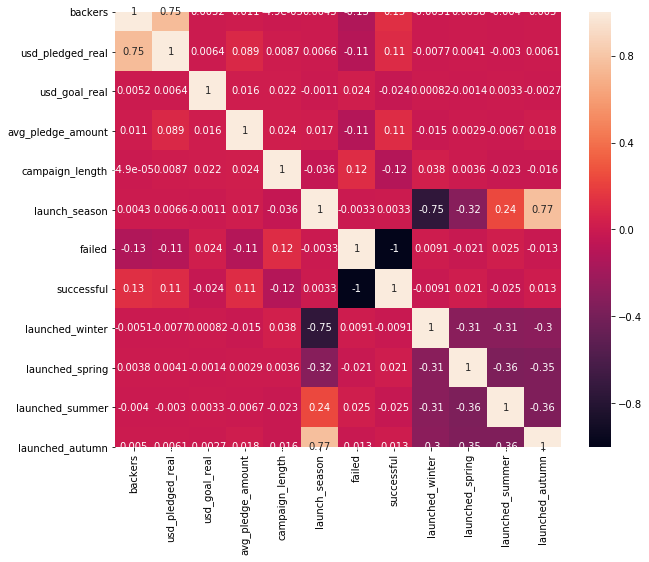

In [31]:
# Calculate correlations
corr = df.corr()
 
# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)

In [89]:
#split dataset in features and target variable
feature_cols = ['backers', 'usd_pledged_real', 'launch_season', 'avg_pledge_amount']

feature_cols2 = ['backers', 'usd_pledged_real', 'launch_season', 'avg_pledge_amount',
               'Fashion', 'Film & Video', 'Food', 'Games', 'Journalism', 'Music',
                'Photography', 'Publishing', 'Technology', 'Theater']


X = df[feature_cols] # Features
X2 = df[feature_cols2] # Features

y = df.successful # Target variable

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Desicion Tree 1

In [69]:
# Create Decision Tree classifer object
clf = tree.DecisionTreeRegressor()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [65]:
cross_val_score(clf, X, y, cv=10)

array([0.16049859, 0.15839917, 0.15398837, 0.15857022, 0.15074274,
       0.14783189, 0.15664468, 0.1572209 , 0.16460457, 0.14941092])

In [70]:
print("Accuracy:",metrics.explained_variance_score(y_test, y_pred))
print("r2 Score:",metrics.r2_score(y_test, y_pred))

Accuracy: 0.15196734272472745
r2 Score: 0.15194461693163253


# Desicion Tree 2

In [63]:
# Create Decision Tree classifer object
clf2 = tree.DecisionTreeRegressor()

# Train Decision Tree Classifer
clf2 = clf2.fit(X_train2,y_train2)

#Predict the response for test dataset
y_pred2 = clf.predict(X_test2)

In [64]:
cross_val_score(clf2, X2, y, cv=10)

array([0.18150504, 0.18455636, 0.17955478, 0.17426287, 0.19872398,
       0.18921603, 0.18418391, 0.18286933, 0.19661539, 0.18875027])

In [66]:
print("Accuracy:",metrics.explained_variance_score(y_test2, y_pred2))
print("r2 Score:",metrics.r2_score(y_test2, y_pred2))

Accuracy: 0.18439931293052103
r2 Score: 0.18438032354289546


# Logitic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


# Logitic Regression 2

In [71]:
logreg2 = LogisticRegression()
logreg2.fit(X_train2, y_train2)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
y_pred2 = logreg2.predict(X_test2)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg2.score(X_test2, y_test2)))

Accuracy of logistic regression classifier on test set: 0.80
